## Importando os dados que iremos utilizar


In [2]:
import pandas as pd


dados = pd.read_pickle("dados\dados_tratados")
dados = dados.drop(
    columns=["infection.county", "occupation", "data", "detection.numerico"]
)  # deletando dados que não vão ser utilizados
dados = dados.reindex()  # apenas para ter certezar que os index estão corretos
print(dados.head(5))

   populacao  probabilidade  latitude  longitude  agriculture  \
0      24392       0.012299 -11.92830   -61.9953          1.0   
1      24392       0.004100 -11.92830   -61.9953          0.0   
2      90353       0.050911  -9.90571   -63.0325          1.0   
3      90353       0.016602  -9.90571   -63.0325          0.0   
4      90353       0.003320  -9.90571   -63.0325          0.0   

   domestic worker  grazing  hunting and fishing  ignored  mining  other  \
0              0.0      0.0                  0.0      0.0     0.0    0.0   
1              0.0      1.0                  0.0      0.0     0.0    0.0   
2              0.0      0.0                  0.0      0.0     0.0    0.0   
3              1.0      0.0                  0.0      0.0     0.0    0.0   
4              0.0      1.0                  0.0      0.0     0.0    0.0   

   panning  road construction  tourism  traveler  vegetal exploitation  
0      0.0                0.0      0.0       0.0                   0.0  
1     

<AxesSubplot:>

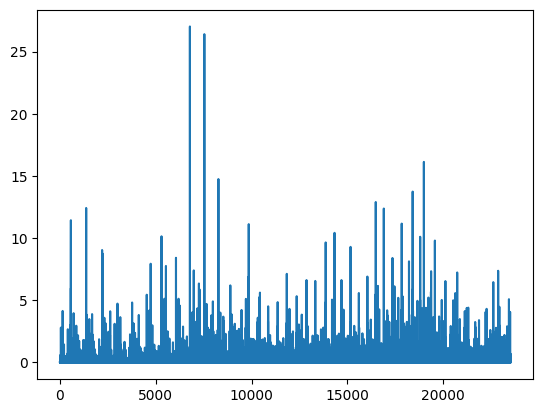

In [4]:
dados["probabilidade"].plot()

## Separando os dados em treino e teste

In [17]:
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 42
DATASET_NAME = "diamonds"
FEATURES = [
    "populacao",
    "latitude",
    "longitude",
    "agriculture",
    "domestic worker",
    "grazing",
    "hunting and fishing",
    "ignored",
    "mining",
    "other",
    "panning",
    "road construction",
    "tourism",
    "traveler",
    "vegetal exploitation",
]
TARGET = ["probabilidade"]


indices = dados.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = dados.loc[indices_treino]
df_teste = dados.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

## Validação cruzada
Agora, com os dados separados, podemos fazer a validação cruzada. Para facilitar iremos selecionar alguns hiperparâmetros e utilizá-los em um loop.

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from itertools import product


NUMS_ARVORES = [80,85,90,95,100]
valures_criterio = ["squared_error", "poisson"]
NUM_FOLDS = 10
NUM_CPU_CORES = 4
SEMENTE_ALEATORIA = 42

for NUM_ARVORES, criterio in product(NUMS_ARVORES,valures_criterio):

    modelo_rf = RandomForestRegressor(
        n_estimators=NUM_ARVORES,
        criterion= criterio,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=NUM_CPU_CORES,
    )
    scores = cross_val_score(
        modelo_rf,
        X_treino,
        y_treino,
        cv=NUM_FOLDS,
        scoring="neg_root_mean_squared_error",
    )
    print(f"O modelo com n_estimators = {NUM_ARVORES},criterion = {criterio}, teve média de {scores.mean()*100} e desvio padrão de {scores.std()}")

O modelo com n_estimators = 80,criterion = squared_error, teve média de -37.154943479419565 e desvio padrão de 0.08139563460893696
O modelo com n_estimators = 80,criterion = poisson, teve média de -37.08111526393595 e desvio padrão de 0.07970557498388042
O modelo com n_estimators = 85,criterion = squared_error, teve média de -37.21944026509269 e desvio padrão de 0.0827898441862632
O modelo com n_estimators = 85,criterion = poisson, teve média de -37.05823535021111 e desvio padrão de 0.07933559653799821
O modelo com n_estimators = 90,criterion = squared_error, teve média de -37.12031034065202 e desvio padrão de 0.08244877924508882
O modelo com n_estimators = 90,criterion = poisson, teve média de -36.96221804759664 e desvio padrão de 0.07917616125643
O modelo com n_estimators = 95,criterion = squared_error, teve média de -37.048190897212315 e desvio padrão de 0.08152722023098971
O modelo com n_estimators = 95,criterion = poisson, teve média de -36.896428322018494 e desvio padrão de 0.078

Aqui, iremos verificar para ter certeza que não aconteceu um overfit com o nosso modelo.

In [19]:
from sklearn.metrics import mean_squared_error

NUMS_ARVORES = [80,85,90,95,100]
valures_criterio = ["squared_error", "poisson"]
NUM_FOLDS = 10
NUM_CPU_CORES = 4
SEMENTE_ALEATORIA = 42

for NUM_ARVORES, criterio in product(NUMS_ARVORES,valures_criterio):
    modelo_rf = RandomForestRegressor(
        n_estimators=NUM_ARVORES,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=NUM_CPU_CORES,
    )
    modelo_rf.fit(X_treino, y_treino)

    y_previsao = modelo_rf.predict(X_teste)
    RMSE = mean_squared_error(y_teste, y_previsao, squared=False)

    print(f"O modelo com n_estimators = {NUM_ARVORES}, criterion = {criterio} teve um RMSE de {RMSE*100}.")

O modelo com n_estimators = 80, criterion = squared_error teve um RMSE de 34.891095974980004.
O modelo com n_estimators = 80, criterion = poisson teve um RMSE de 34.891095974980004.
O modelo com n_estimators = 85, criterion = squared_error teve um RMSE de 35.19097380195916.
O modelo com n_estimators = 85, criterion = poisson teve um RMSE de 35.19097380195917.
O modelo com n_estimators = 90, criterion = squared_error teve um RMSE de 35.02353147003529.
O modelo com n_estimators = 90, criterion = poisson teve um RMSE de 35.02353147003529.
O modelo com n_estimators = 95, criterion = squared_error teve um RMSE de 35.18842651531625.
O modelo com n_estimators = 95, criterion = poisson teve um RMSE de 35.18842651531625.
O modelo com n_estimators = 100, criterion = squared_error teve um RMSE de 35.3817285154602.
O modelo com n_estimators = 100, criterion = poisson teve um RMSE de 35.3817285154602.


Podemos perceber que os valores não foram tão diferentes, portanto é improvável que tenha acontecido um overfit. Contudo, pudemos notar que o melhor modelo na validação cruzada foi o pior no modelo normal.

Então, utilizando os hiperparâmetros do melhor modelo da validação cruzada teremos a seguinte previsão.

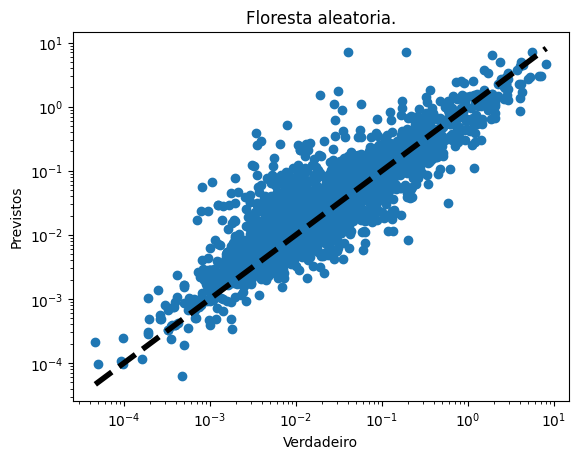

In [21]:
import matplotlib.pyplot as plt

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

fig, ax = plt.subplots()
ax.scatter(y_verdadeiro, y_previsao)
ax.plot(
    [y_verdadeiro.min(), y_verdadeiro.max()],
    [y_verdadeiro.min(), y_verdadeiro.max()],
    "k--",
    lw=4,
)
ax.set_title("Floresta aleatoria")
ax.set_xlabel("Verdadeiro")
ax.set_ylabel("Previstos")
# plot em log para melhor visualização
ax.set_yscale("log")
ax.set_xscale("log")
plt.show()


In [24]:
from math import sqrt
from sklearn.metrics import max_error

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)
RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
RRMSE = RMSE / sqrt(sum(y_previsao**2)) # Fórmula do RRMSE
erro_maximo = max_error(y_verdadeiro, y_previsao)
print(
    f"O RRMSE do modelo árvore de decisão foi de {RRMSE} e o erro máximo foi {erro_maximo}."
)

O RRMSE do modelo árvore de decisão foi de 0.013843545397172714 e o erro máximo foi 7.09281077175145.


Quando comparamos com o modelo antigo de Floresta Aleatória, temos que o RRMSE é melhor que o antigo, porém, o erro máximo muito maior, em comparação com o antigo.
Mas, podemos urilizar esse modelo, apesar de tudo, já que nosso RRMSE foi bom.